In [1]:
# Add the src directory to the Python path
import sys
sys.path.append('../src')
# Import necessary modules
from table_formatter import format_table
from eda import EDAHandler
from visualization import Visualizer

In [2]:
# Initialize the EDAHandler class with the file path
eda = EDAHandler('../data/Insurance_data.csv')


c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\eda.py:6: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(file_path)


In [3]:

# Calculate the descriptive statistics
numerical_stats, categorical_stats = eda.descriptive_statistics()

# Format the numerical and categorical statistics for better display
print(numerical_stats )
print(categorical_stats)


       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.0

Descriptive Statistics
The descriptive statistics summary provides an overview of the numerical and categorical attributes in the dataset:

Numerical Variables:

TotalPremium: This column shows a wide range, with a mean of 61.90 and a maximum value of 65,282.60, indicating significant variability in premium values.
TotalClaims: The standard deviation is high, indicating a large range of claim amounts. The maximum value of 393,092.10 suggests the presence of extreme claim values, which may need further investigation for outliers.
Cylinders and Kilowatts: These columns show a high degree of consistency, particularly for Cylinders, where most entries are 4. This suggests that most vehicles have 4 cylinders.
Categorical Variables:

TransactionMonth: The dataset mostly contains records from 2015, with the most frequent date being 2015-08-01.
Gender and MaritalStatus: Both have many "Not specified" entries, possibly indicating missing or unrecorded data.
Country: All records are from South Africa, which suggests the dataset may be geographically limited.

In [7]:
eda.data_structure()

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

Data Structure (Data Types)
The data types of the columns are mostly consistent with their intended use:

Potential Issue: The TransactionMonth column is stored as an object type but should likely be converted to a datetime type to enable easier manipulation for time-based analysis.

In [3]:
missing_data = eda.missing_values()
print("Missing Values:\n", missing_data)

Missing Values:
 Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


Missing Data
There are several columns with missing values:

CustomValueEstimate has nearly 78% missing data, which is significant.
WrittenOff, Rebuilt, and Converted have over 60% missing data, which may indicate that these columns are not applicable to all policies or are inconsistently recorded.
CrossBorder and NumberOfVehiclesInFleet have almost no valid data, with 100% missing for NumberOfVehiclesInFleet and a majority missing for CrossBorder, suggesting these columns may be dropped unless more context is provided for their use.
Other columns such as Gender, MaritalStatus, and AccountType have a lower but still significant percentage of missing data.


In [3]:
# Clean the data and save to a CSV
cleaned_data = eda.clean_data(output_path='../data/cleaned_data.csv')




Missing Values After Cleaning:
 Series([], dtype: int64)

✅ Cleaned dataset saved to: ../data/cleaned_data.csv


Handel missing values by:

Dropped NumberOfVehiclesInFleet which had almost no valid data, with 100% missing values.
Impute numerical columns with the median (more robust than mean)
Fill categorical columns with 'Unknown'

In [5]:
# Check the first few rows of the cleaned data
cleaned_data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [15]:
# Initialize Visualizer
visualizer = Visualizer(cleaned_data)

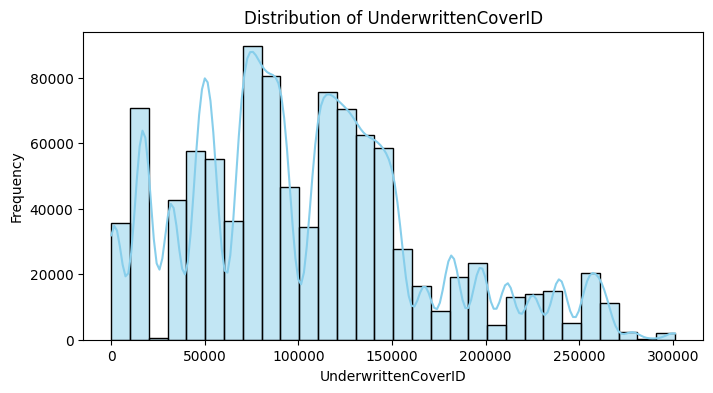

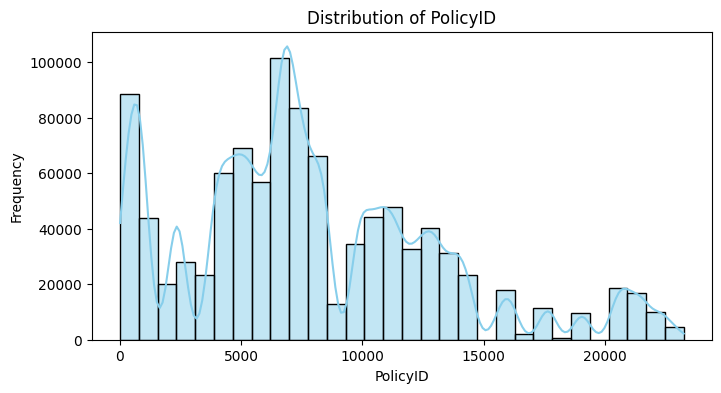

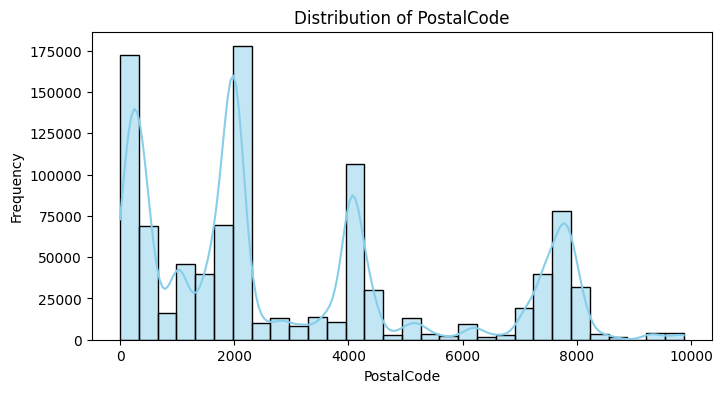

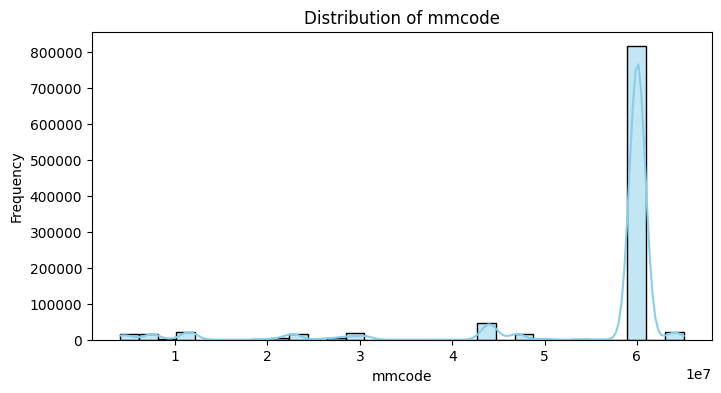

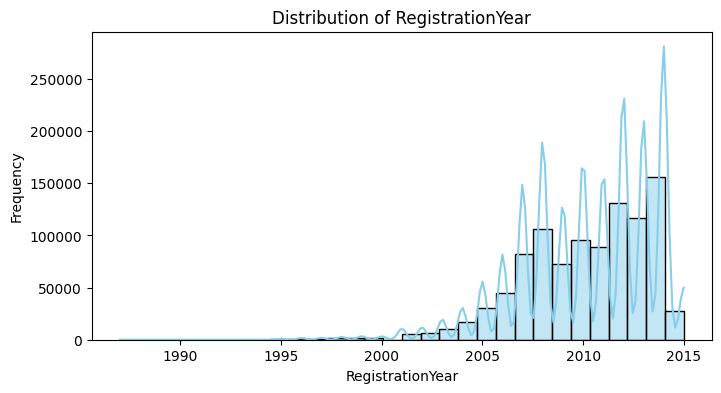

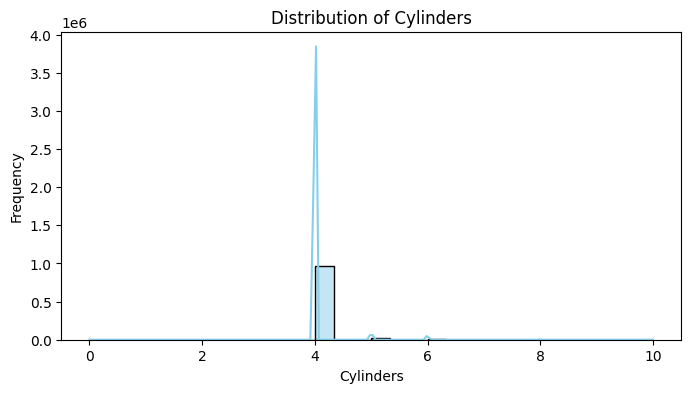

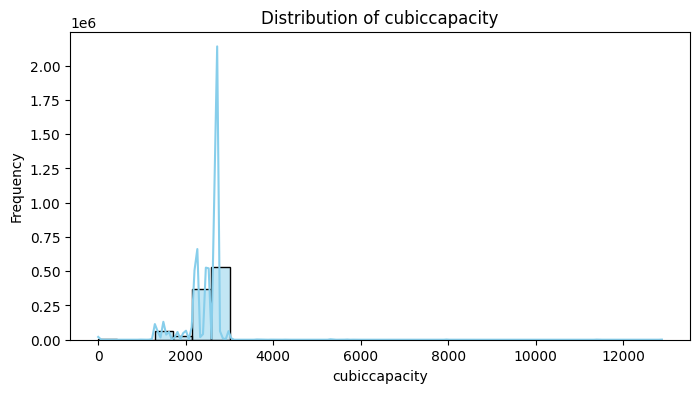

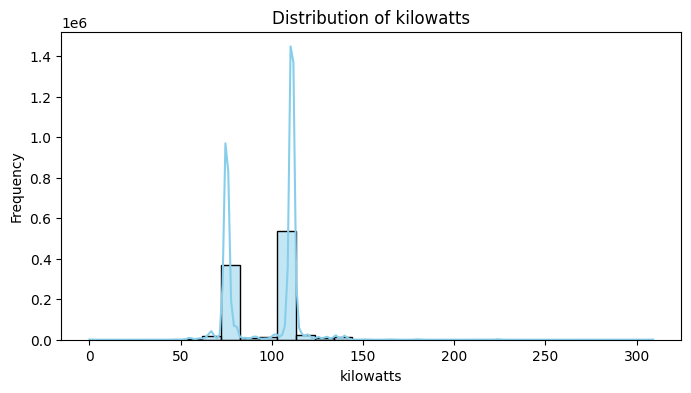

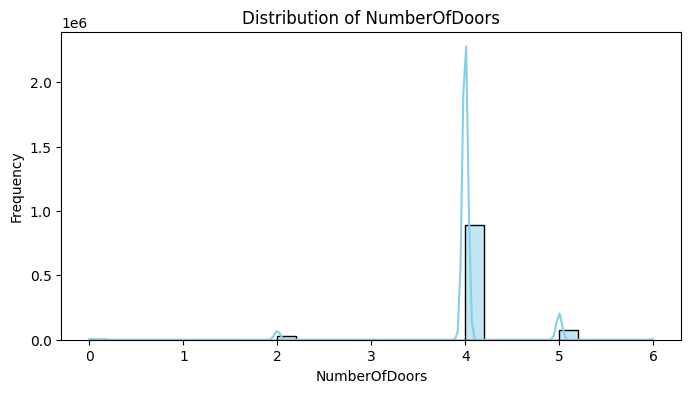

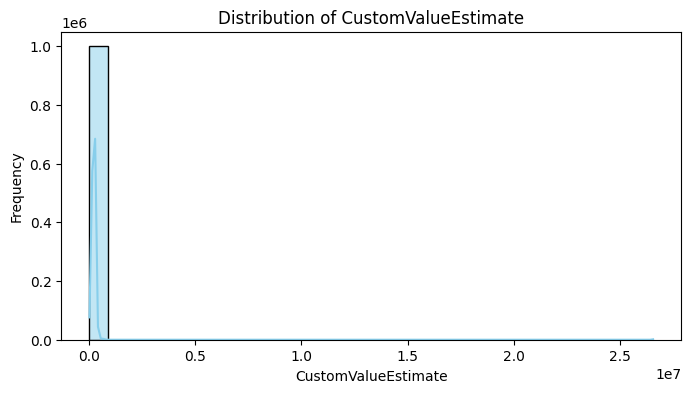

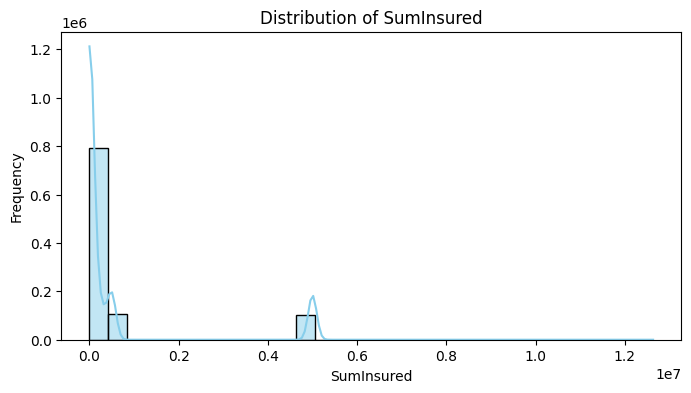

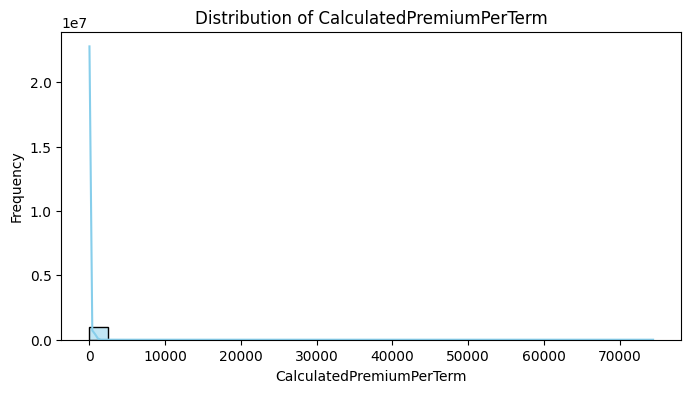

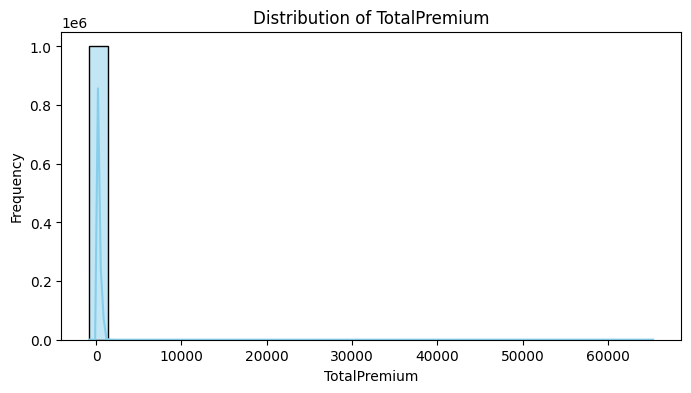

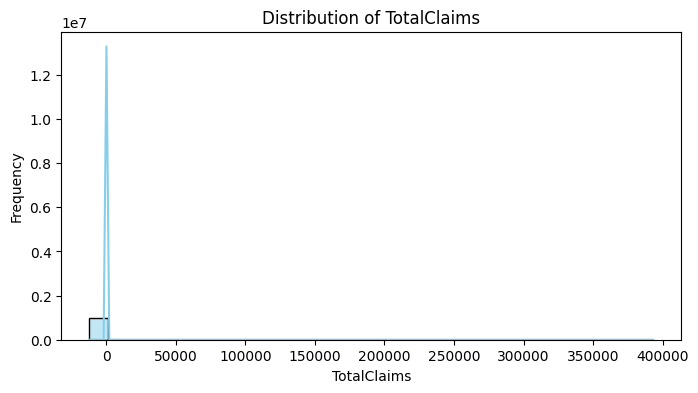

In [7]:
# Plot Numerical Distributions
visualizer.plot_numerical_distribution()

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


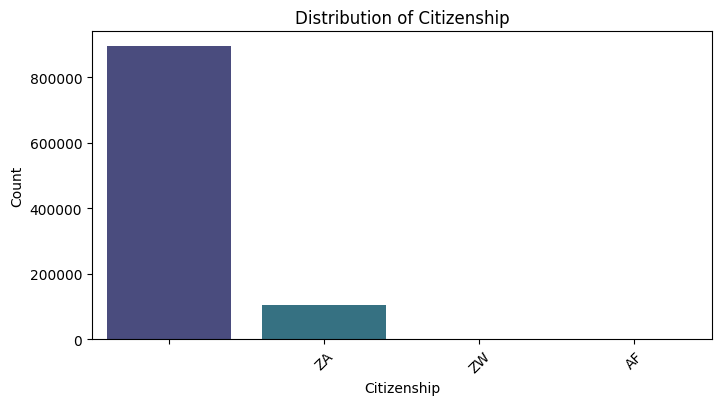

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


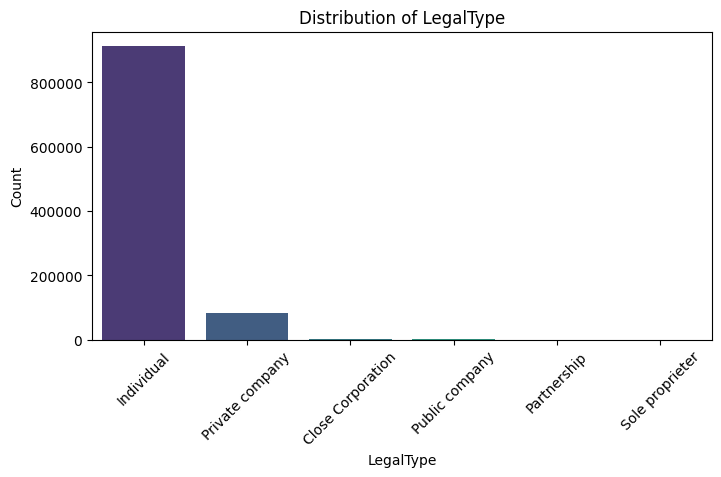

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


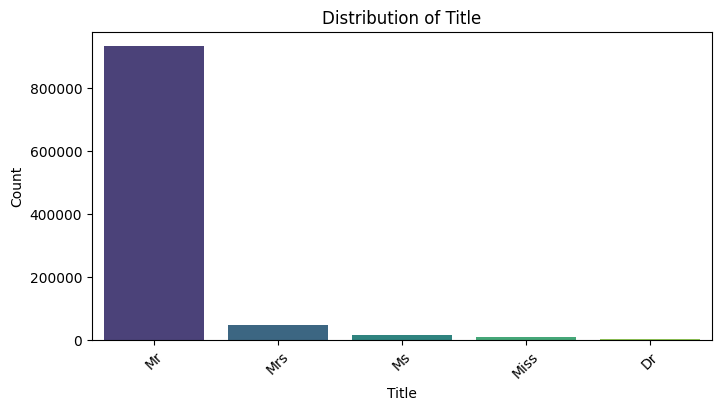

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


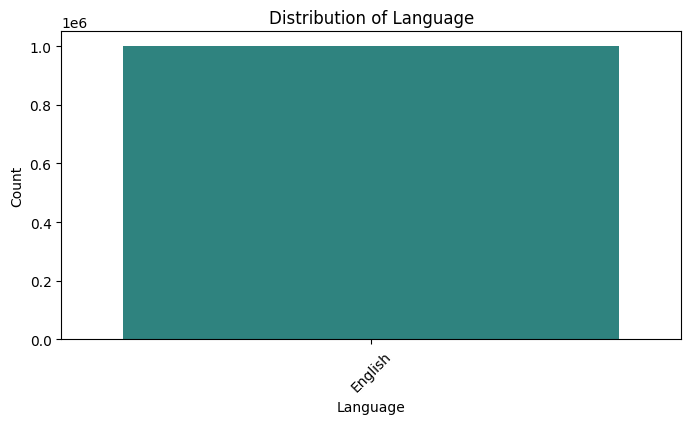

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


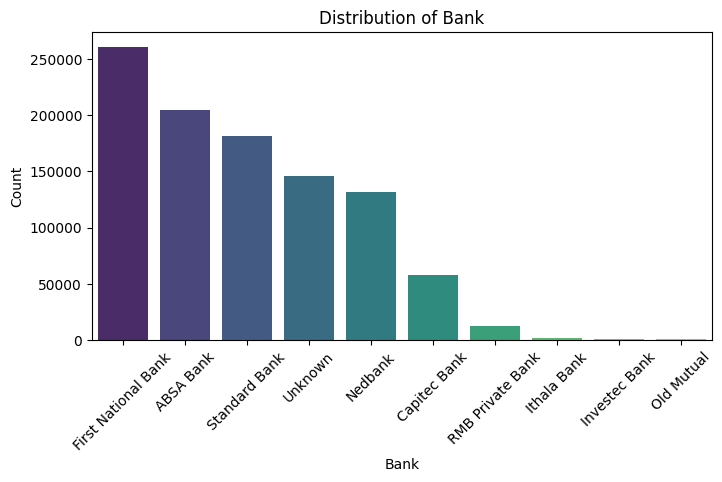

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


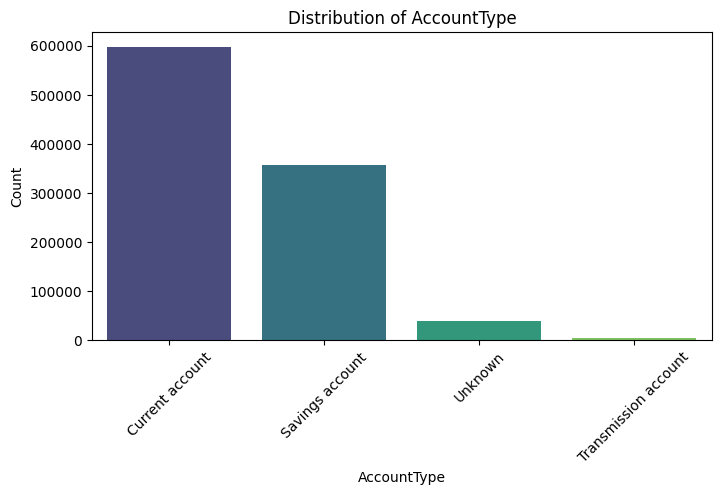

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


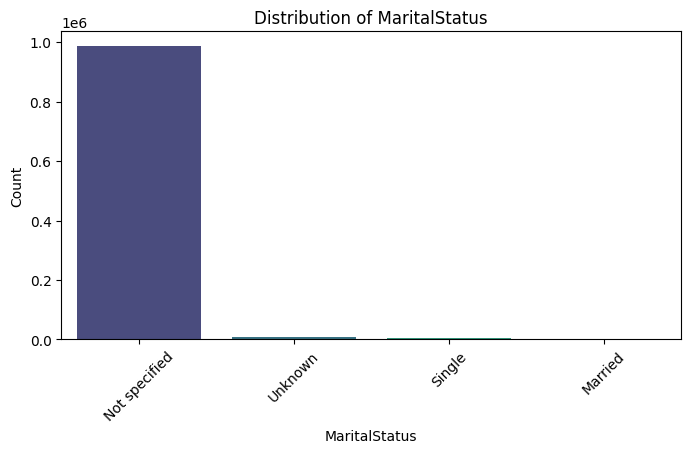

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


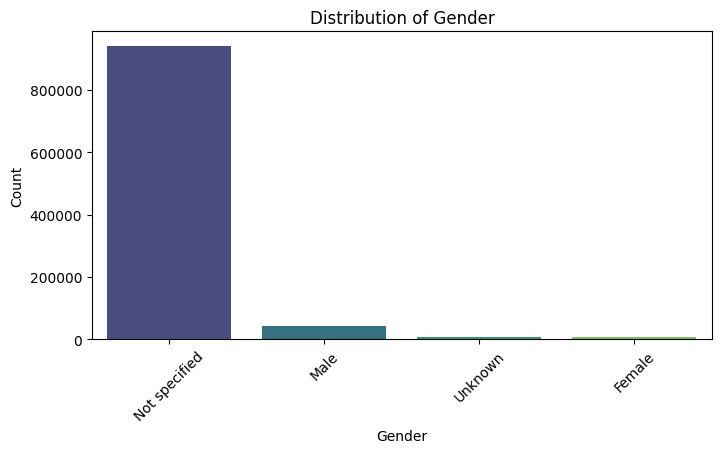

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


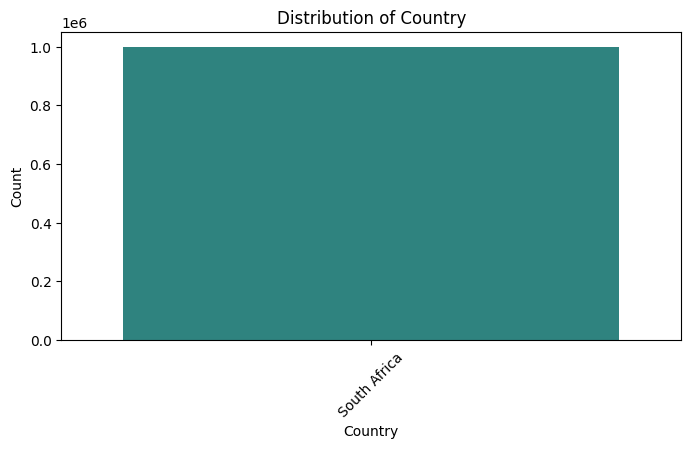

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


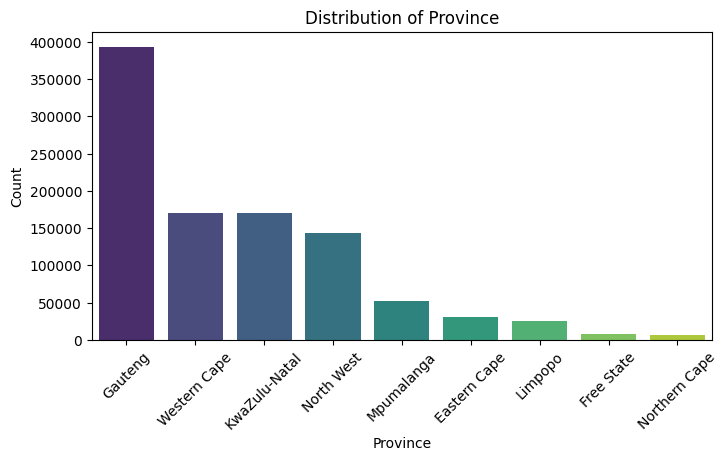

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


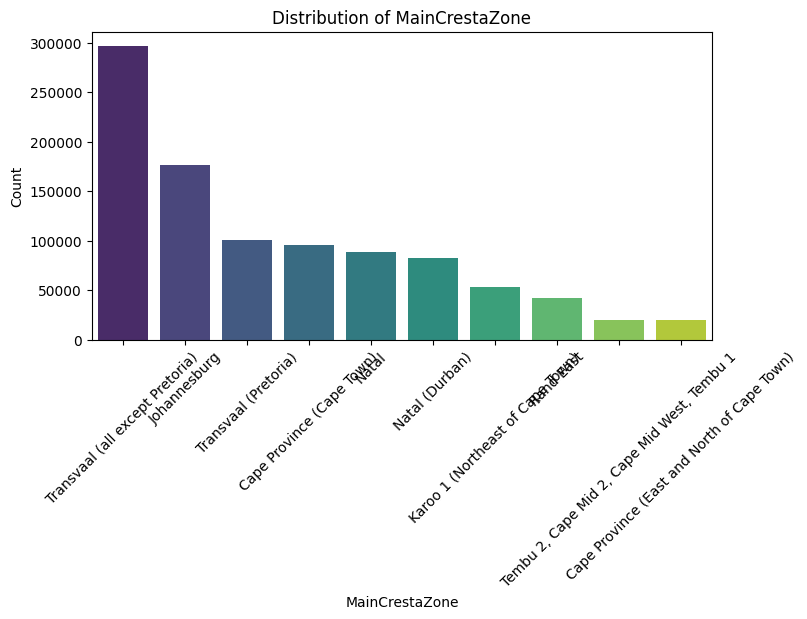

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


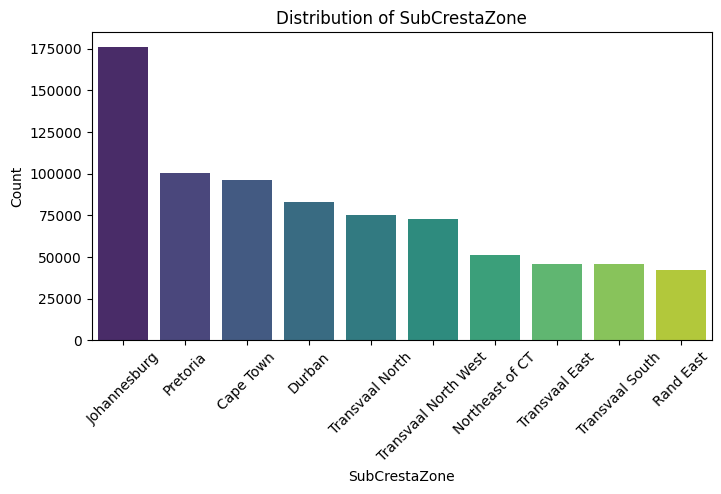

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


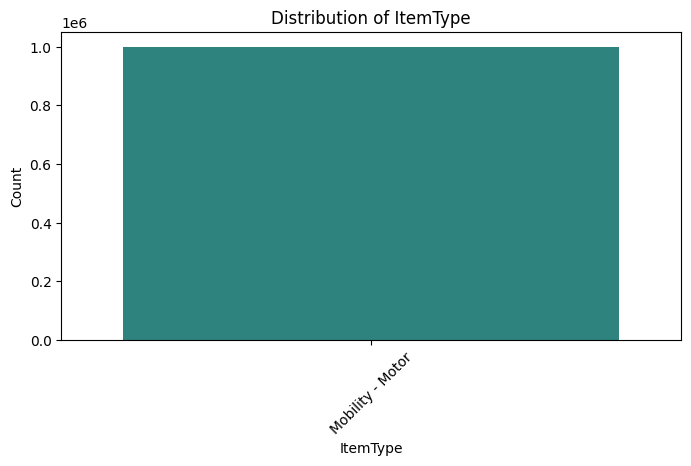

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


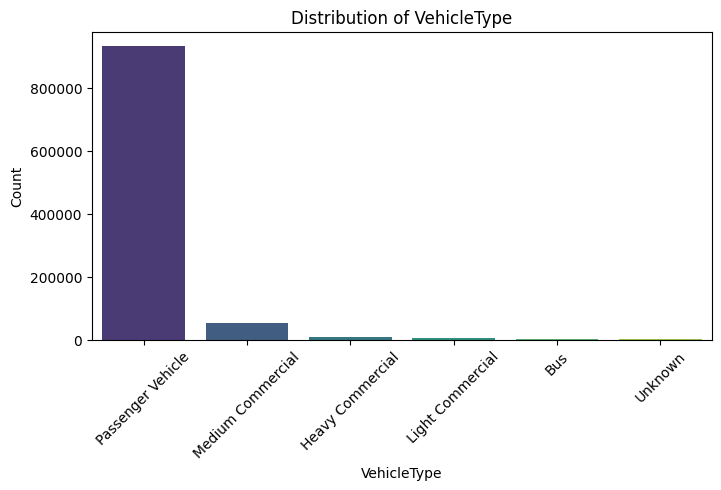

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


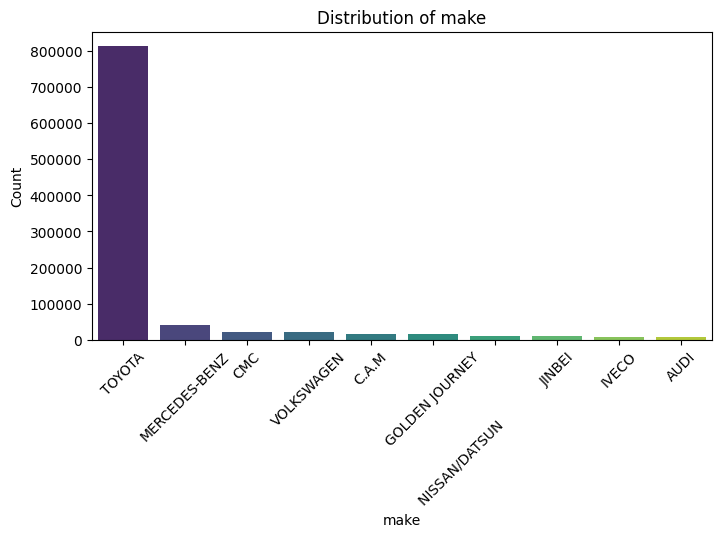

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


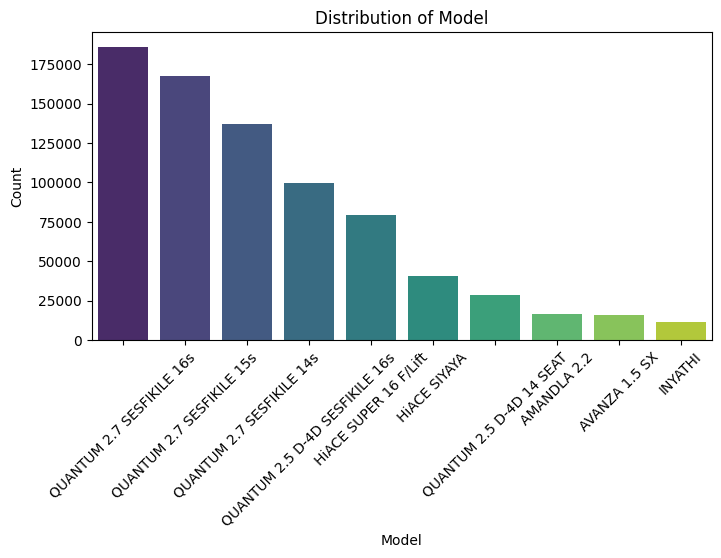

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


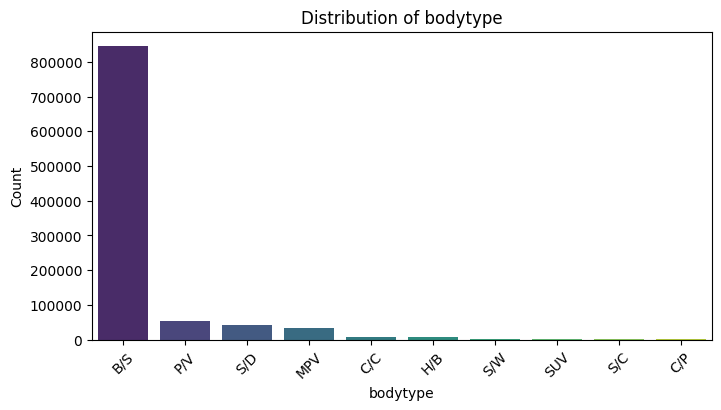

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


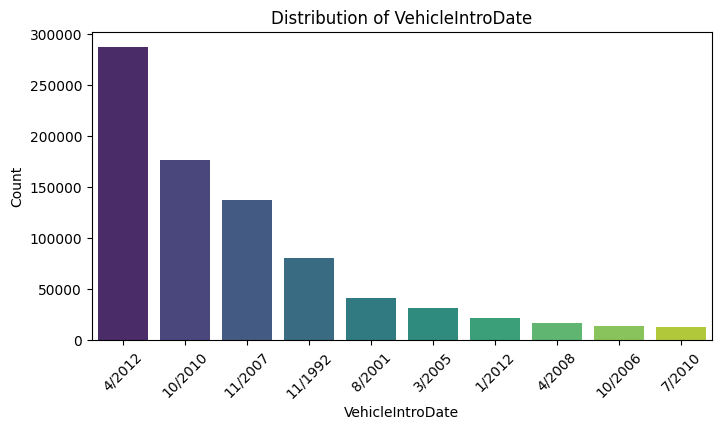

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


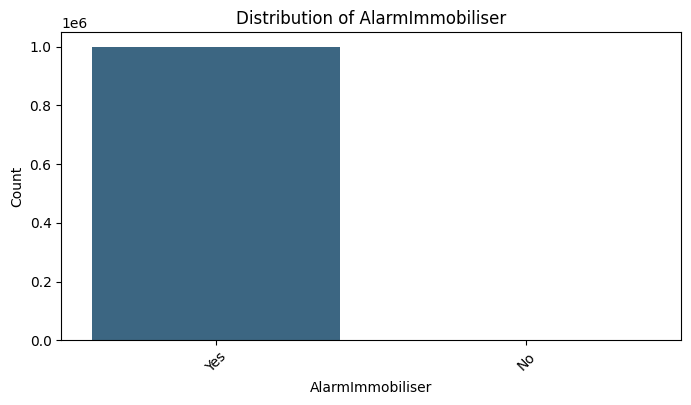

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


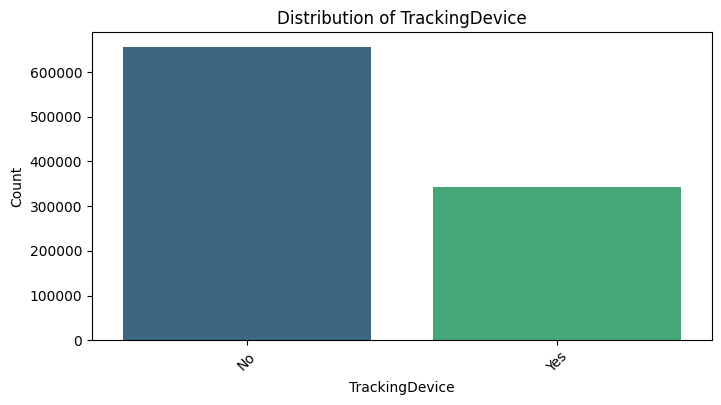

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


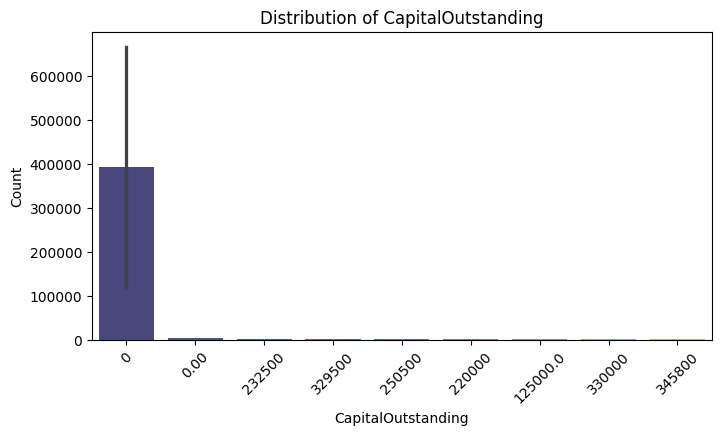

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


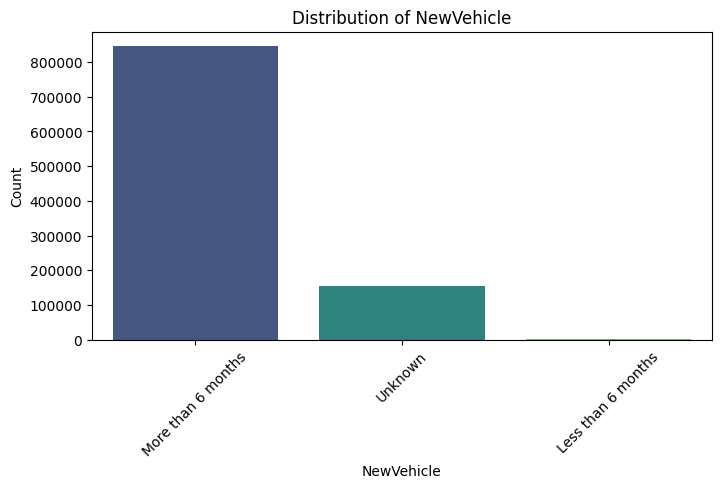

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


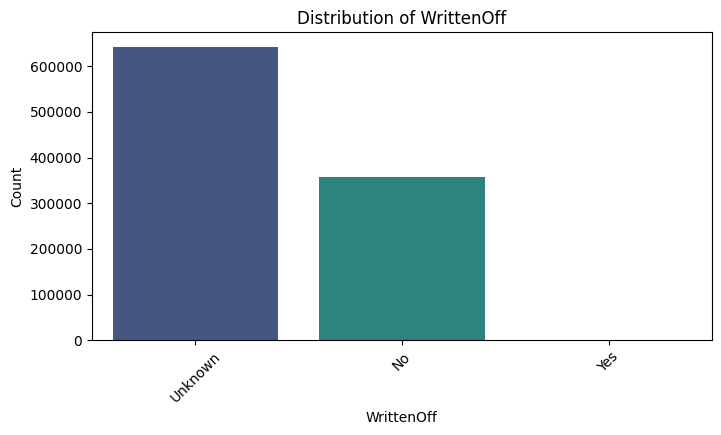

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


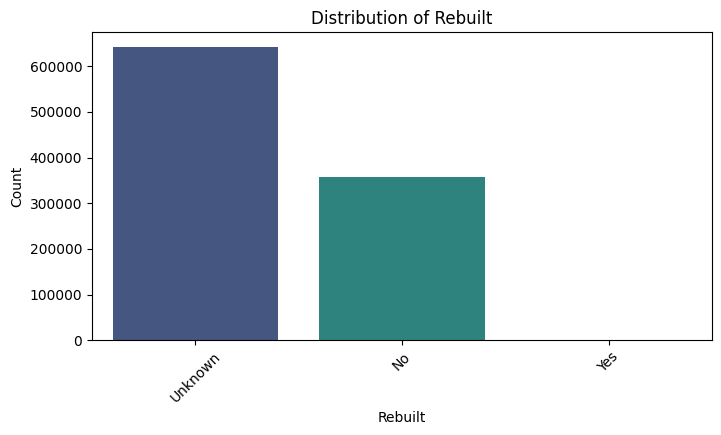

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


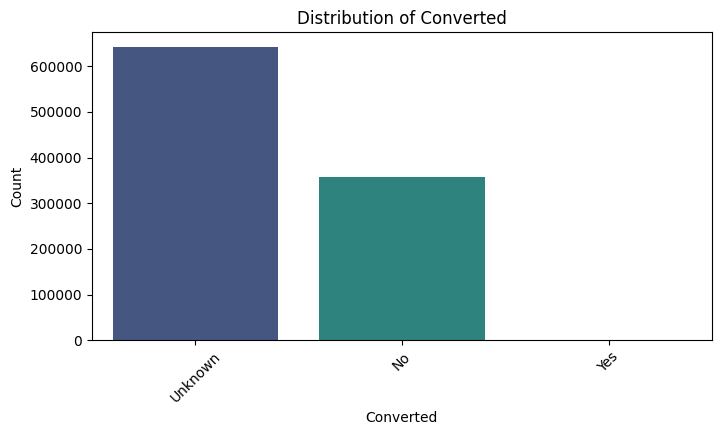

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


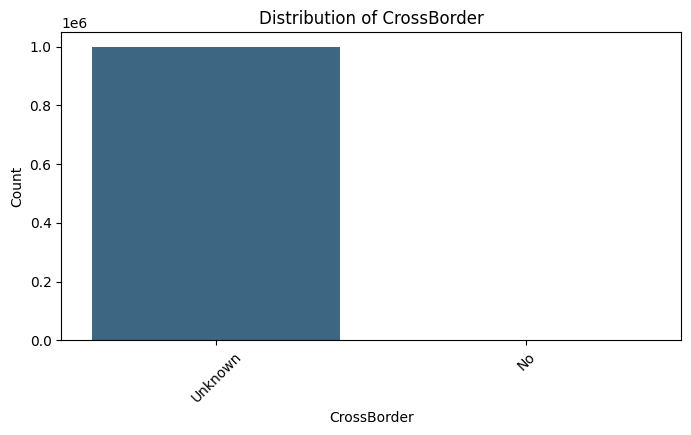

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


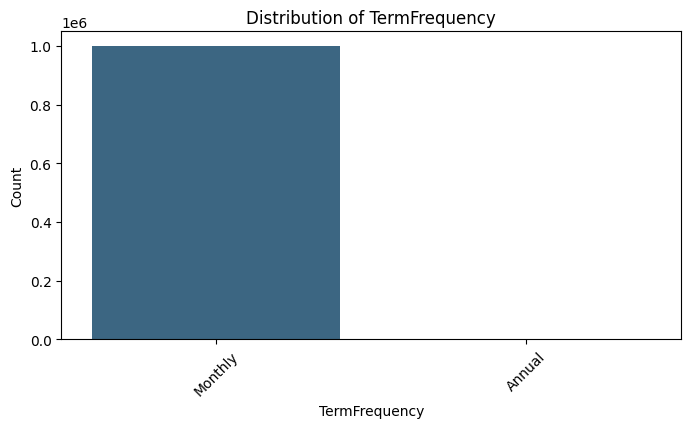

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


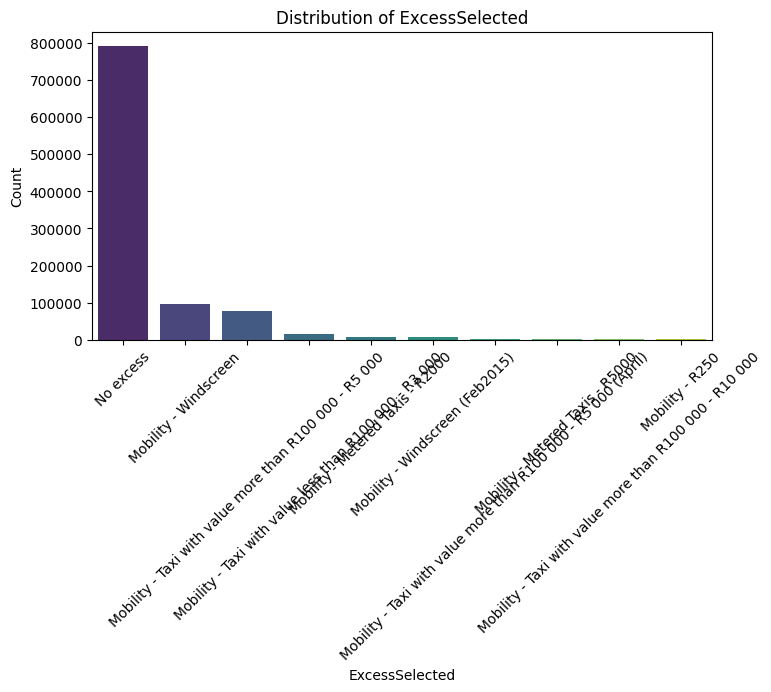

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


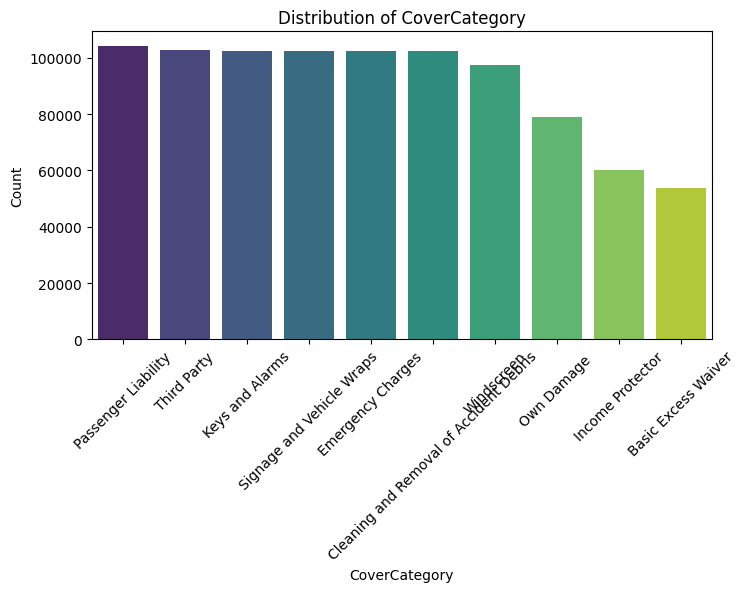

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


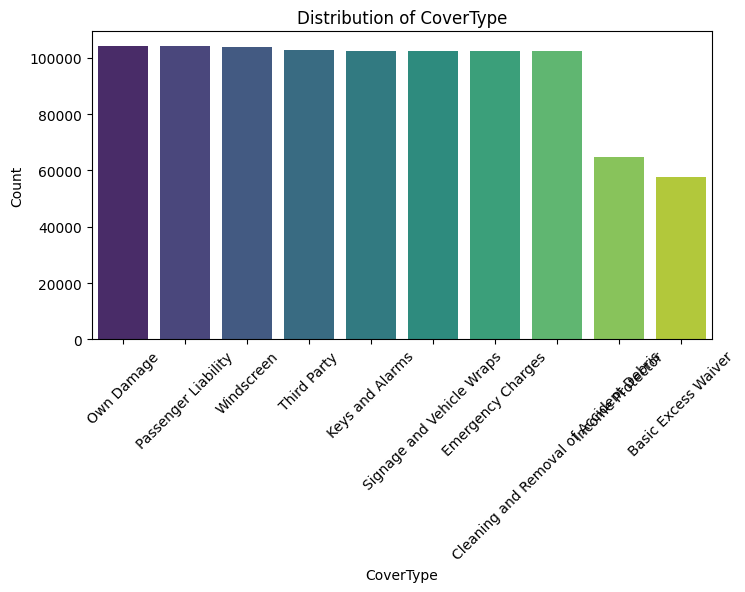

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


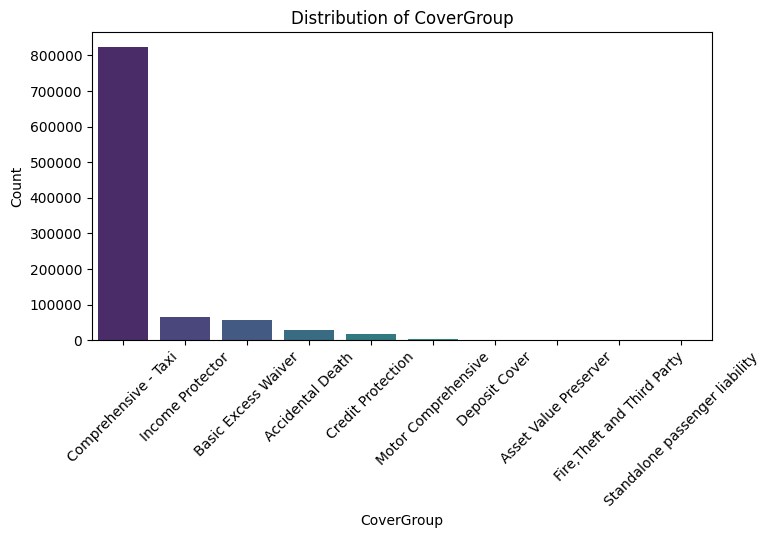

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


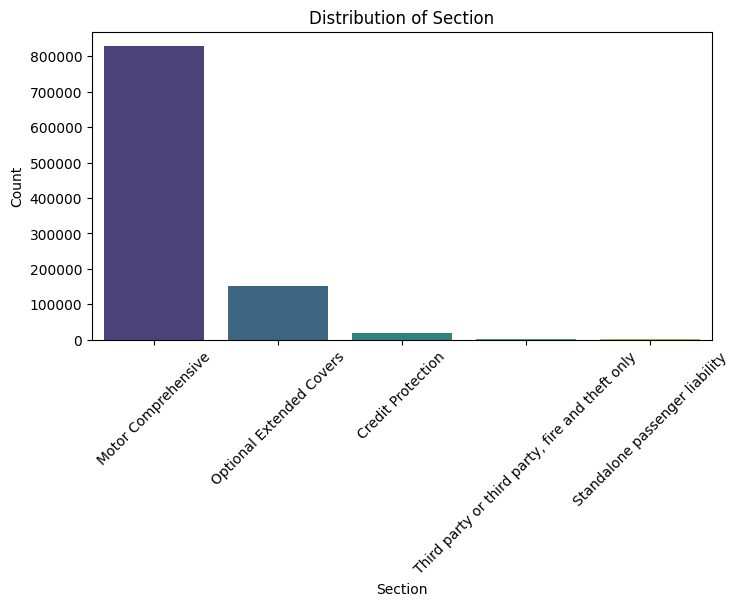

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


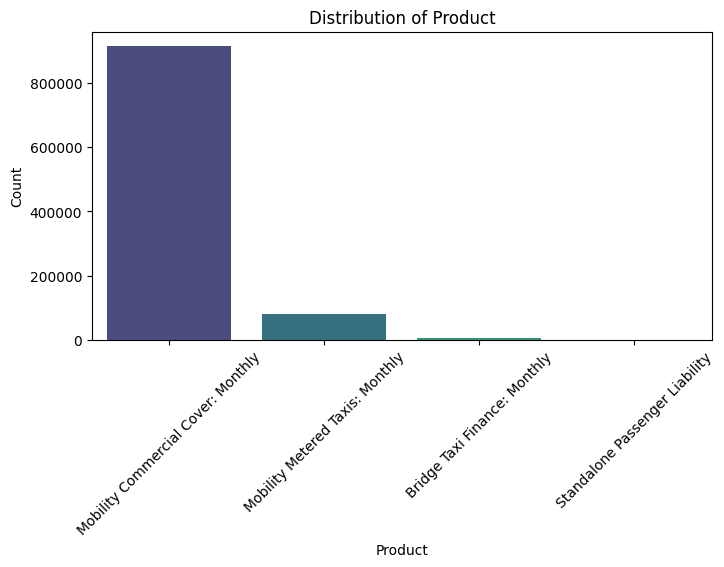

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


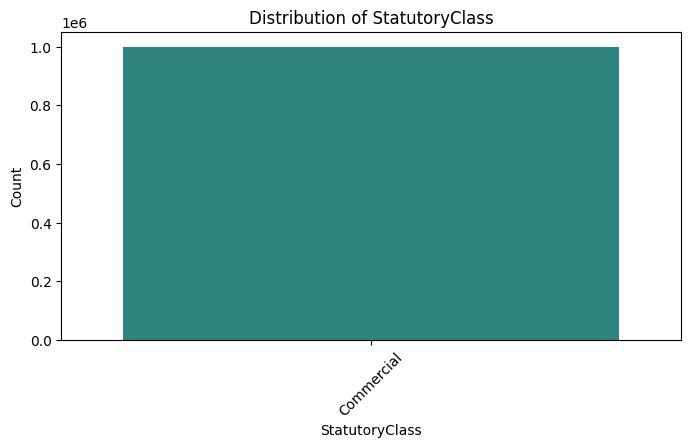

c:\Users\bksam\AlphaCare-Insurance-Analysis\notebooks\../src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


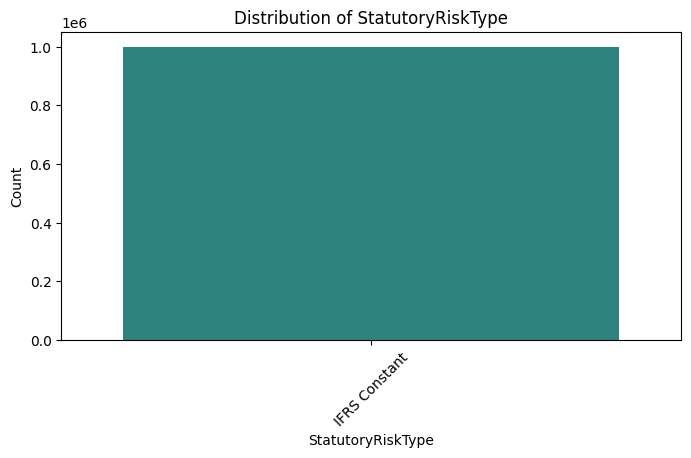

In [7]:
# Plot Categorical Distributions
visualizer.plot_categorical_distribution()

In [4]:
# Initialize the Visualizer
visualizer = Visualizer(cleaned_data)


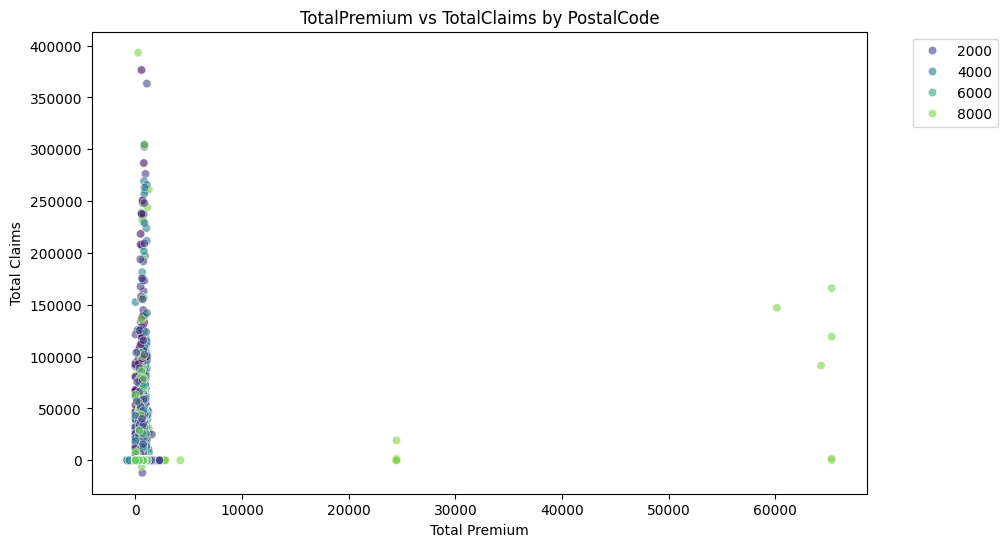

In [5]:
# Scatter Plot: TotalPremium vs TotalClaims by PostalCode
visualizer.plot_totalpremium_vs_totalclaims_by_postalcode()


Observations from the Plot:
Clustering Around Low Premiums:

The majority of data points are concentrated near the lower end of TotalPremium values.
This suggests that most clients have relatively low premiums.
High Claims for Low Premiums:

Several data points with low TotalPremium exhibit high TotalClaims, indicating potential risk profiles.
Sparse Data in High Premium Ranges:

Few data points exist in the higher premium ranges, and they show a spread in claims.
Regional Differences:

Different PostalCode groups (indicated by color) show slight variations in claim distribution.

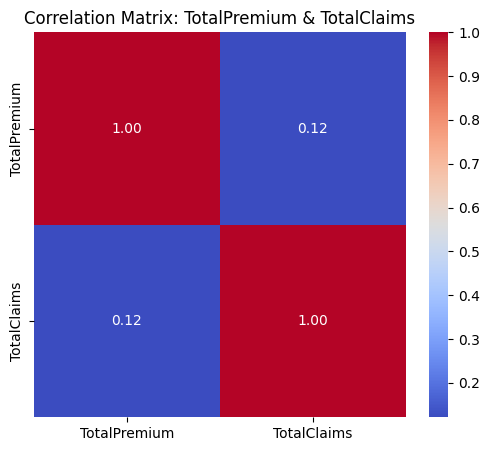

In [10]:
# Correlation Matrix
visualizer.plot_correlation_matrix()

Insights
The diagonal values (1.00) represent perfect self-correlation.
The off-diagonal value (0.12) indicates a weak positive correlation between TotalPremium and TotalClaims.
This suggests that as TotalPremium increases, TotalClaims tend to increase slightly, but the relationship is not strong.

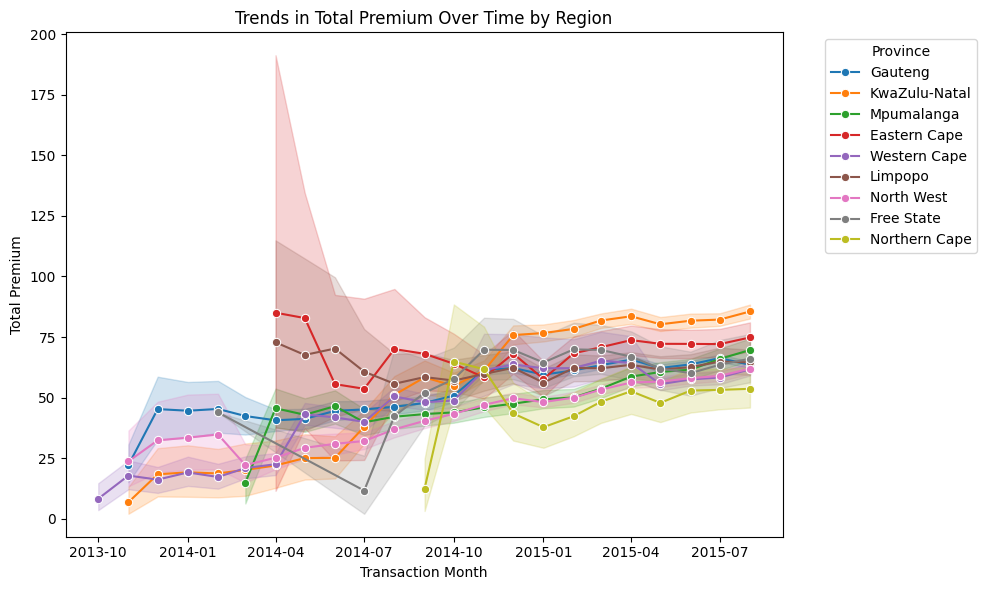

In [6]:
# Plot Total Premium trends across regions
visualizer.plot_premium_trend()


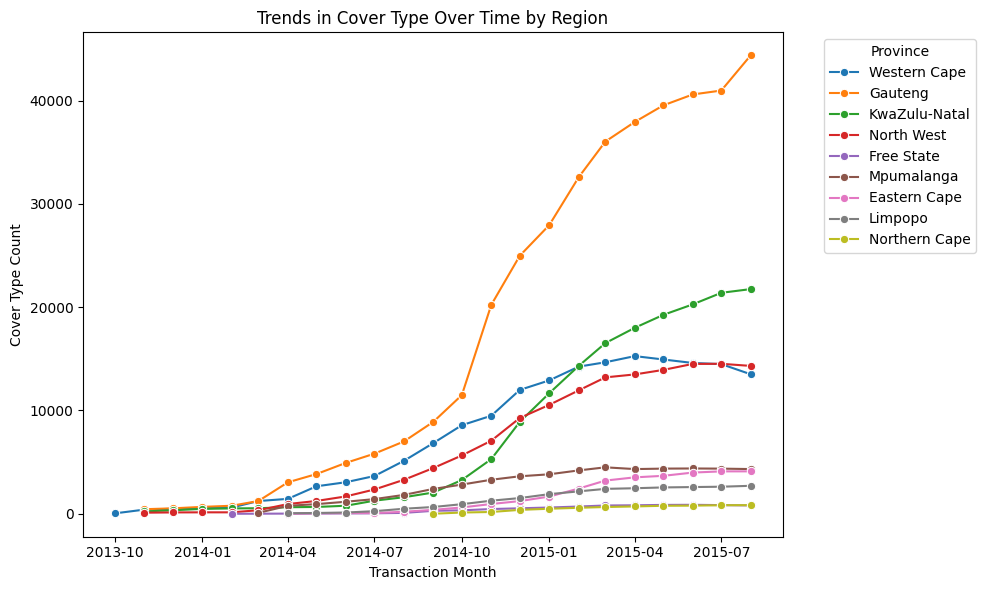

In [7]:

# Plot Insurance Cover Type trends across regions
visualizer.plot_cover_type_trend()


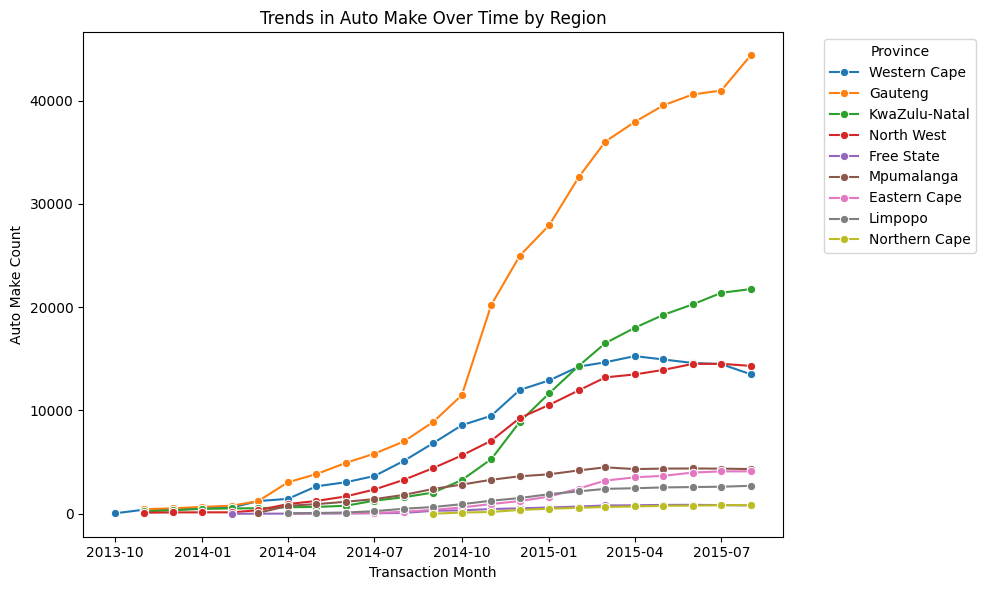

In [8]:

# Plot Auto Make trends across regions
visualizer.plot_auto_make_trend()

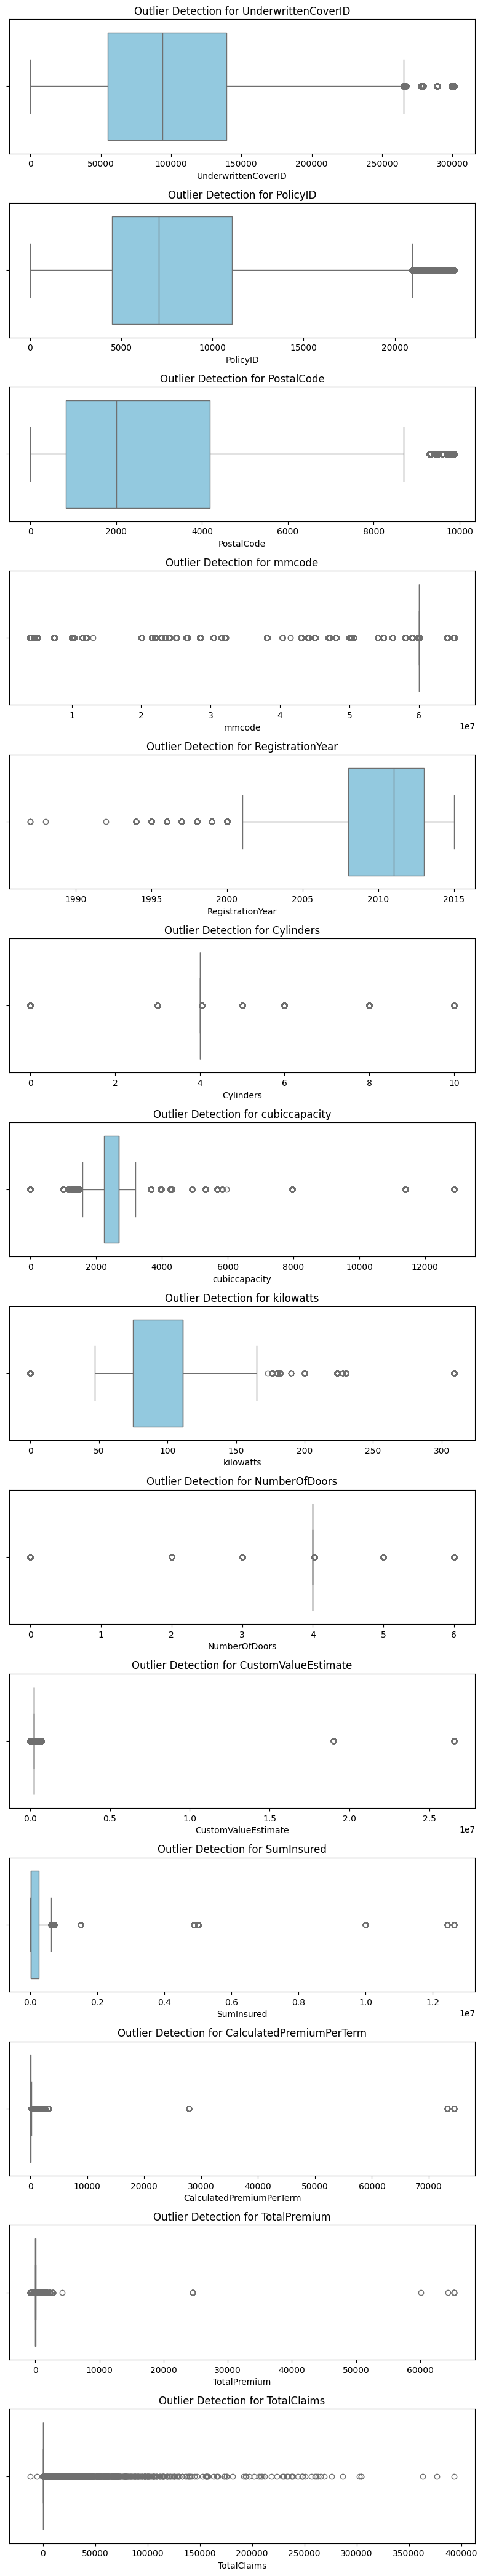

In [5]:
# Detect Outliers with Box Plots
visualizer.plot_outlier_detection()

In [8]:
# Step 3: Handle Outliers Using IQR
cleaned_data_no_outliers = eda.handle_outliers_iqr()

Outliers handled using IQR method for numerical columns.


In [12]:
# Specify the path where the CSV file will be saved
file_path = '../data/cleaned_data_no_outliers.csv'

# Save the DataFrame to a CSV file
cleaned_data_no_outliers.to_csv(file_path, index=False)
